# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# **Sources for dataset**



> Delaney's dataset: https://pubs.acs.org/doi/10.1021/ci034243x


> For generating RDKit descriptors:

*   https://youtu.be/da08T-xJke0
*   https://youtu.be/NozaWUkJ3YM
*   https://youtu.be/hZnX4Watvno









# **Load data**

In [2]:
df = pd.read_excel('solubility_mlr.xlsx')
df.head()

,Compound ID,measured log(solubility:mol/L),MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,"1,1,1,2-Tetrachloroethane",-2.18,6.619599,6.619599,2.047068,-2.293981,0.487138,19.333333,167.850,165.834,...,0,0,0,0,0,0,0,0,0,0
1,"1,1,1-Trichloroethane",-2.00,6.520833,6.520833,2.145833,-2.516204,0.445171,23.400000,133.405,130.381,...,0,0,0,0,0,0,0,0,0,0
2,"1,1,2,2-Tetrachloroethane",-1.74,6.662809,6.662809,2.170525,-2.170525,0.527312,19.333333,167.850,165.834,...,0,0,0,0,0,0,0,0,0,0
3,"1,1,2-Trichloroethane",-1.48,6.607253,6.607253,2.269290,-2.392747,0.480258,23.400000,133.405,130.381,...,0,0,0,0,0,0,0,0,0,0
4,"1,1,2-Trichlorotrifluoroethane",-3.04,11.544753,11.544753,3.685957,-4.226080,0.553756,14.250000,187.375,187.375,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,measured log(solubility:mol/L),MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,...,1144.000000,1144.000000,1144.000000,1144.000000,1144.0,1144.000000,1144.0,1144.000000,1144.0,1144.000000
mean,-3.057997,9.904794,9.904794,1.107795,-3.158068,0.553755,36.531554,204.631675,192.199969,204.151949,...,0.029720,0.022727,0.003497,0.013112,0.0,0.006119,0.0,0.001748,0.0,0.074301
std,2.096502,2.691606,2.691606,1.152689,1.614930,0.149406,22.206241,102.620500,99.248636,102.282168,...,0.169889,0.176009,0.059054,0.113804,0.0,0.078018,0.0,0.041794,0.0,0.275390
min,-11.600000,3.125000,3.125000,0.000247,-6.760705,0.146432,8.000000,16.043000,12.011000,16.031300,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,-4.332250,7.609230,7.609230,0.220988,-4.208314,0.451232,20.657895,122.126000,112.087000,122.010072,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
50%,-2.870500,8.636000,8.636000,0.670265,-3.418099,0.534175,29.500000,183.594500,172.146000,183.493400,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
75%,-1.600000,12.389802,12.389802,1.605903,-2.492253,0.652274,45.475000,270.715750,258.067500,270.505870,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
max,1.580000,20.442813,20.442813,4.256952,1.597222,0.934235,130.857143,780.949000,716.437000,780.429607,...,1.000000,2.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,2.000000


# **Define variables**

In [4]:
df.columns.values

array(['Compound ID', 'measured log(solubility:mol/L)',
       'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex',
       'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt',
       'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons',
       'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge',
       'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2',
       'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI',
       'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI',
       'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n',
       'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n',
       'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1',
       'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10',
       'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14',
       'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6',
       'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9',

In [15]:
y = df[['measured log(solubility:mol/L)']]
x1 = df[['MolWt', 'MolLogP']]

In [16]:
x1

,MolWt,MolLogP
0,167.850,2.59540
1,133.405,2.37650
2,167.850,2.59380
3,133.405,2.02890
4,187.375,2.91890
...,...,...
1139,287.343,1.98820
1140,286.114,3.42130
1141,308.333,3.60960
1142,354.815,2.56214


# **Plot the scatter plot using matplotlib**

Text(0.5, 0, 'MolLogP')

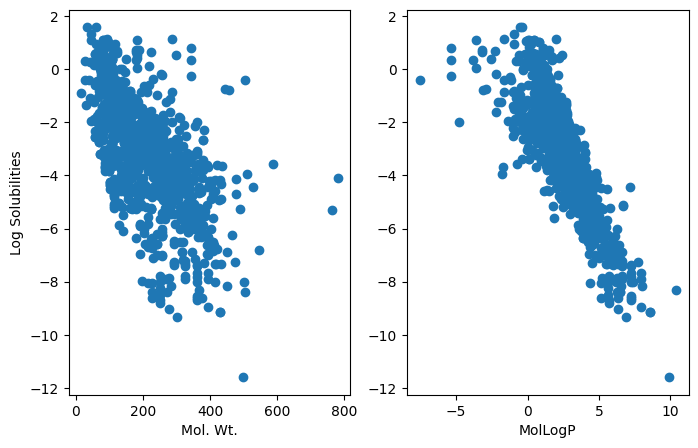

In [17]:
fig = plt.figure(2, figsize=(8,5))
ax1 = fig.add_subplot(121)
plt.scatter(x1['MolWt'], y)
ax1.set_xlabel('Mol. Wt.')
ax1.set_ylabel('Log Solubilities')
ax2 = fig.add_subplot(122)
plt.scatter(x1['MolLogP'],y)
ax2.set_xlabel('MolLogP')

## **Multiple Linear Regression using statsmodel**

In [18]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     measured log(solubility:mol/L)   R-squared:                       0.765
Model:                                        OLS   Adj. R-squared:                  0.765
Method:                             Least Squares   F-statistic:                     1861.
Date:                            Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                                    12:54:58   Log-Likelihood:                -1640.3
No. Observations:                            1144   AIC:                             3287.
Df Residuals:                                1141   BIC:                             3302.
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

# **Regression using scikitlearn**

In [19]:
lr = LinearRegression()
lr.fit(x1,y)

LinearRegression()

In [20]:
lr.score(x1,y)

0.7653993798321588

In [21]:
lr.intercept_

array([0.14540973])

In [22]:
lr.coef_

array([[-0.00653423, -0.76202306]])

In [23]:
y

,measured log(solubility:mol/L)
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [24]:
yhat = lr.predict(x1)
yhat

array([[-2.92911602],
       [-2.53723749],
       [-2.92789678],
       ...,
       [-4.61990853],
       [-4.12544409],
       [-2.56618536]])

<Axes: xlabel='measured log(solubility:mol/L)'>

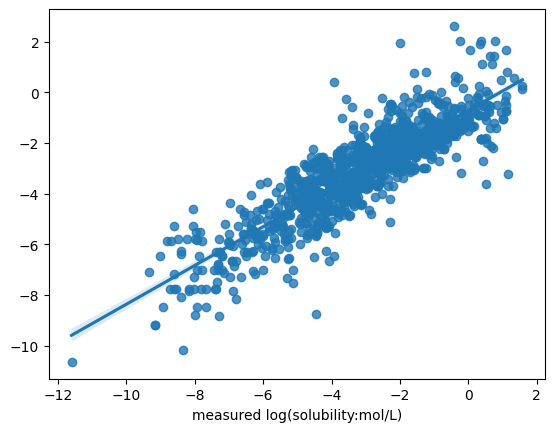

In [27]:
sns.regplot(x=y, y=yhat)